# Employee Churn Analysis EDA

## 1) Problem Statement

Employee attrition poses a critical challenge to organizational stability and growth. This project aims to develop a machine learning model that predicts whether an employee is likely to leave the company based on HR-related numerical features such as satisfaction level, work hours, and time spent at the company. Accurate predictions can help HR teams proactively address employee concerns, improve retention strategies, and reduce turnover-related costs

**Problem**： What’s likely to make the employee leave the company?

The dataset provided by the HR department at Salifort Motors comprises 14,999 rows and 10 columns, capturing various attributes pertaining to employee demographics, job-related factors, and potential indicators of turnover.

Here are the variables included in the dataset along with their descriptions:

satisfaction_level: Employee-reported job satisfaction level [0–1]

last_evaluation: Score of the employee's last performance review [0–1]

number_project: Number of projects the employee contributes to

average_monthly_hours: Average number of hours the employee worked per month

time_spend_company: Duration of the employee's tenure with the company (in years)

Work_accident: Whether or not the employee experienced an accident while at work

left: Whether or not the employee left the company (0 for 'stay' and 1 for 'left')

promotion_last_5years: Whether or not the employee was promoted in the last 5 years (0 for 'No' and 1 for 'Yes')

department: The employee's department

salary: The employee's salary (in U.S. dollars)

This comprehensive dataset enables in-depth analysis and modeling to identify patterns and factors influencing employee turnover within the organization.


## 2) Data Collection

Dataset Source:- [www.kaggle.com/datasets/raminhuseyn/hr-analytics-data-set](https://www.kaggle.com/datasets/raminhuseyn/hr-analytics-data-set)

### 2.1 Load Data and Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Print top 5 records as sample

In [2]:
df = pd.read_csv("HR_dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#Shape of the dataset
df.shape

(14999, 10)

## 3) Data Checks to Perform

### 3.1. Check Missing Values

In [4]:
df.isnull().sum()       #No missing value

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### 3.2. Check Duplicates

In [5]:
print(df.duplicated().sum())        

3008


In [6]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [7]:
#Checking shape of dataset
print("Shape of dataset after removing duplicates: ", df.shape)

Shape of dataset after removing duplicates:  (11991, 10)


### 3.3. Check data type

In [8]:
df.info()           # 2 categorical and 8 numerical columns

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### 3.4. Check unique values of each column

In [9]:
#Number of unique values in each column
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

In [10]:
for col in df.columns:
    print(f"Unique values of column '{col}':\n")
    print(df[col].unique())
    print('\n','-'*50,'\n')

Unique values of column 'satisfaction_level':

[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]

 -------------------------------------------------- 

Unique values of column 'last_evaluation':

[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]

 -------------------------------------------------- 

Uniqu

### 3.5. Check statistics of dataset

In [11]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Observations:-

1. Employees have contributed to atleast 2 projects in their time at company, with maximum no. of 7 projects.
2. Every employee spends atleast 2 years in the company, where average monthly hours is 200.
3. The minimum last evaluation review is 0.36.

## 4) Exploring data

### 4.1. Identifying categorical and numerical features

In [12]:
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']

print("Categorical features are: ",categorical_features)
print("Numerical features are: ",numerical_features)

Categorical features are:  ['Department', 'salary']
Numerical features are:  ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']


### 4.2. Finding out proportion of categories in each categorical column



Axes(0.172591,0.747241;0.132759x0.132759)

 --------------------------------------------------


Axes(0.446121,0.747241;0.132759x0.132759)

 --------------------------------------------------


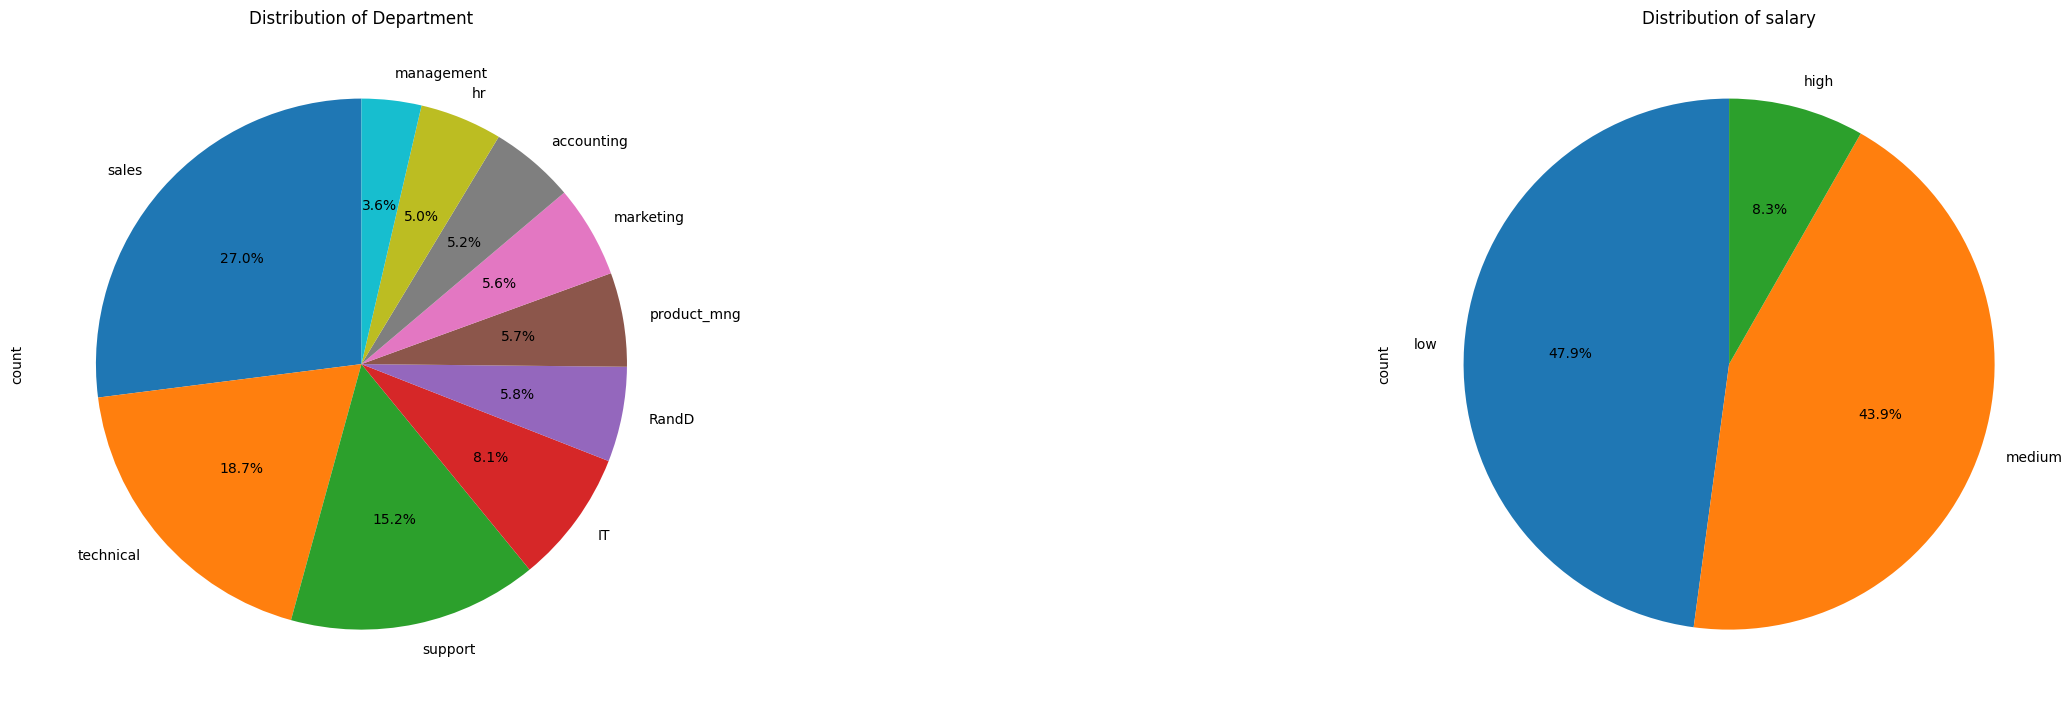

In [13]:
plt.figure(figsize=(50,50))
for i in range(0,len(categorical_features)):
    plt.subplot(5,3,i+1)
    print('\n')
    print(df[categorical_features[i]].value_counts().plot.pie(autopct='%1.1f%%', startangle=90))
    plt.title(f"Distribution of {categorical_features[i]}")
    print('\n','-'*50)

#### Observations:-

1. Around 60% of employees are in either Sales, Technical or Support Departments, from 10 departments.
2. Meagre 8.3% of employees get high tier of salary.
3. 47.9% lies in low tier and 48% in medium salary tier.

### 4.3. Finding out distribution in each numerical column

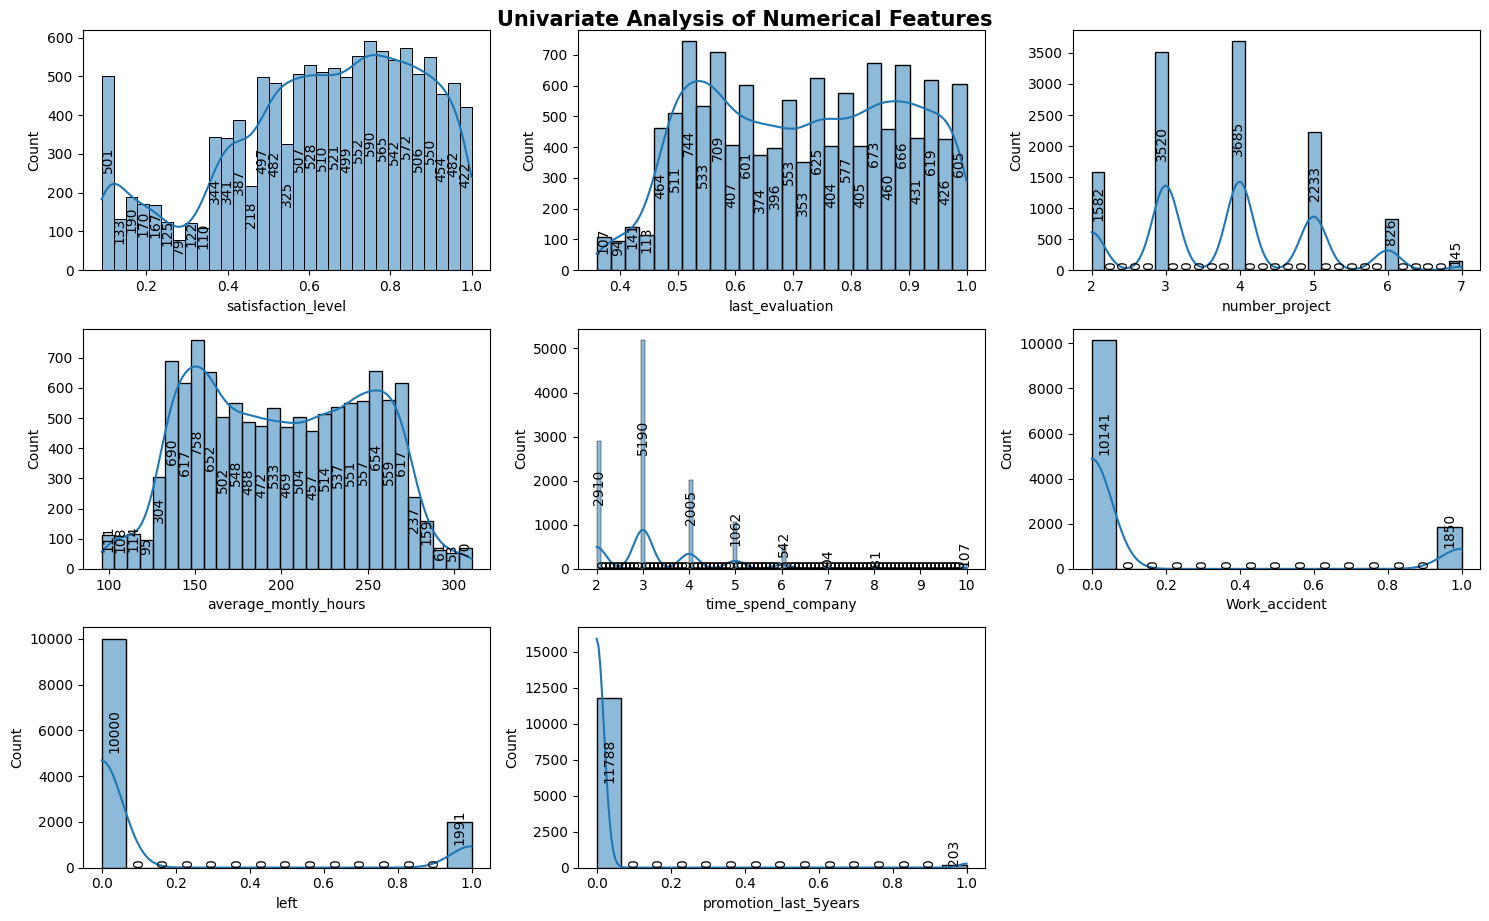

In [14]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Features",fontsize=15,fontweight='bold')

for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)

    ax = sns.histplot(df[numerical_features[i]],kde=True)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height / 2),
                    ha='center', va='bottom', rotation = 90, fontsize=10)

    plt.xlabel(numerical_features[i])
    plt.tight_layout()

#### Observations:-

1. From 11,999 employee records, only 1991 of them have left the company.
2. Promotion to only 203 employees in last 5 years, is really low.
3. The satisfaction levels recorded are almost uniformly distributed in the range of 0.4-1.
4. For last evaluation reviews, the metric is highly distributed in range of 0.5-1.
5. Large no. of employees have contributed in 3-5 projects (many with atleast 2 projects), but with increasing no. of projects, engaged employees are decreasing.  
6. Similar kind of trend can be noticed in terms of years spent, where maximum employees have spent 2-4 years, but then no. of employees decreases with increasing no. of years spent.
7. Average monthly hours spend by the employee is dominantly in between 150 to 250 hours.
8. 15% of employees has suffered from work accidents, which should be avoided.

### 4.4. Factors most correlated with employees leaving the company (Correlation In Numerical Features)

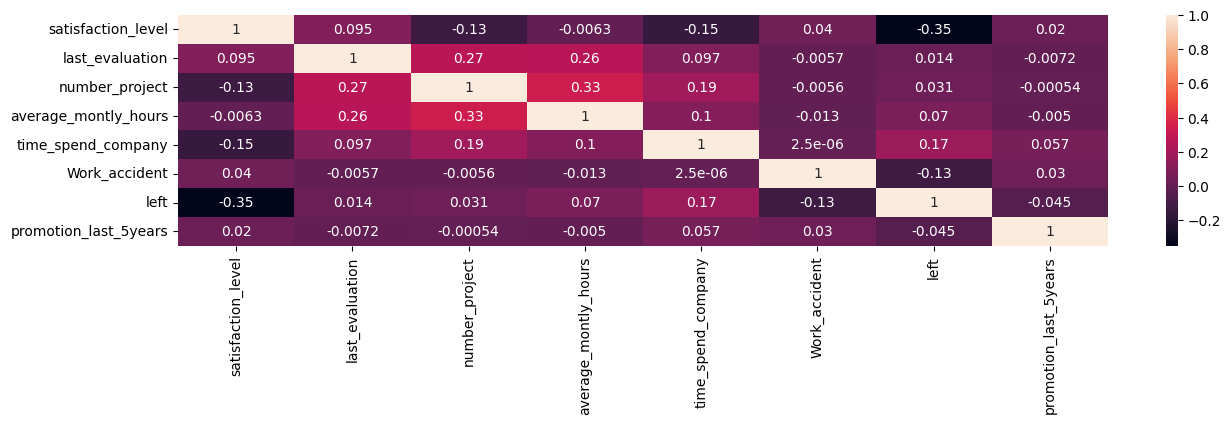

In [15]:
corr = df[numerical_features].corr()
plt.figure(figsize=(15,3))
sns.heatmap(corr, annot=True)
plt.show()

#### Observations:-

1. Satisfaction level is the only factor close to influencing employee attrition (- 0.35), indicating as the satisfaction level increases, more likelier the employee stays and vice versa.
2. Significant correlations can be observed between number_project and average_monthly_hours (+ 0.33), number_project and last_evaluation (+ 0.27), and average_monthly_hours and last_evaluation (+ 0.26). 

### 4.5. Distribution of Employees left across departments

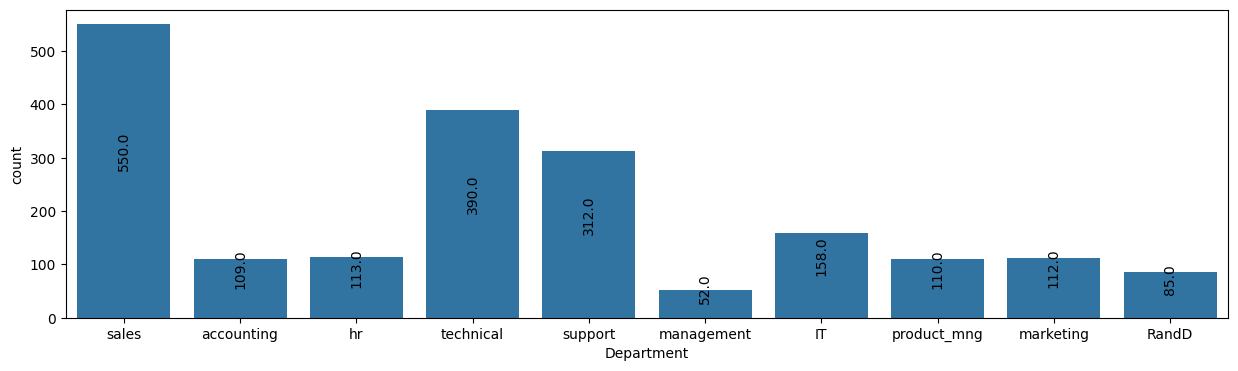

In [16]:
plt.figure(figsize=(15,4))

ax = sns.countplot(data=df[df['left']==1],x='Department')
    
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height / 2),
                ha='center', va='bottom', rotation = 90, fontsize=10)
plt.show()

Many employees have left from Sales, Technical and Support departments, maybe since they occupy most of the employees in comparison to rest of the departments

### 4.6. Relation between Satisfaction Levels and Last_evaluation Reviews in Employees Left

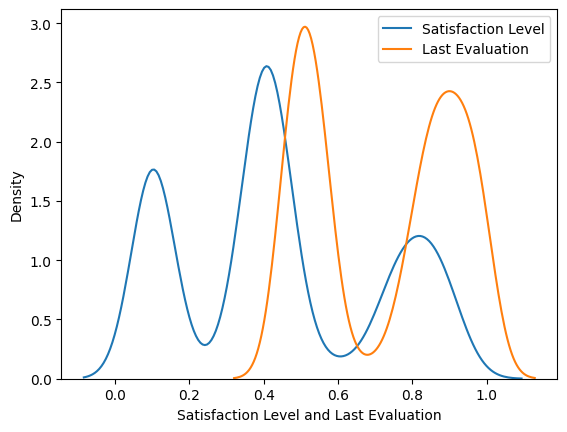

In [17]:
sns.kdeplot(data=df[df['left']==1], x='satisfaction_level', label = 'Satisfaction Level',palette='Set1')
sns.kdeplot(data=df[df['left']==1], x='last_evaluation', label = 'Last Evaluation', palette='Set2')
plt.legend()
plt.xlabel('Satisfaction Level and Last Evaluation')
plt.show()

In [18]:
corr = df[df['left']==1][['satisfaction_level','last_evaluation']].corr()
corr

,satisfaction_level,last_evaluation
satisfaction_level,1.000000,0.182685
last_evaluation,0.182685,1.000000


From the graph, it can be observed that as the satisfaction level rises or dips, the last evaluation review also rises or dips (but not in coherence). These features have low but positive correlation

### 4.7. Average Satisfaction and Workload Across Departments

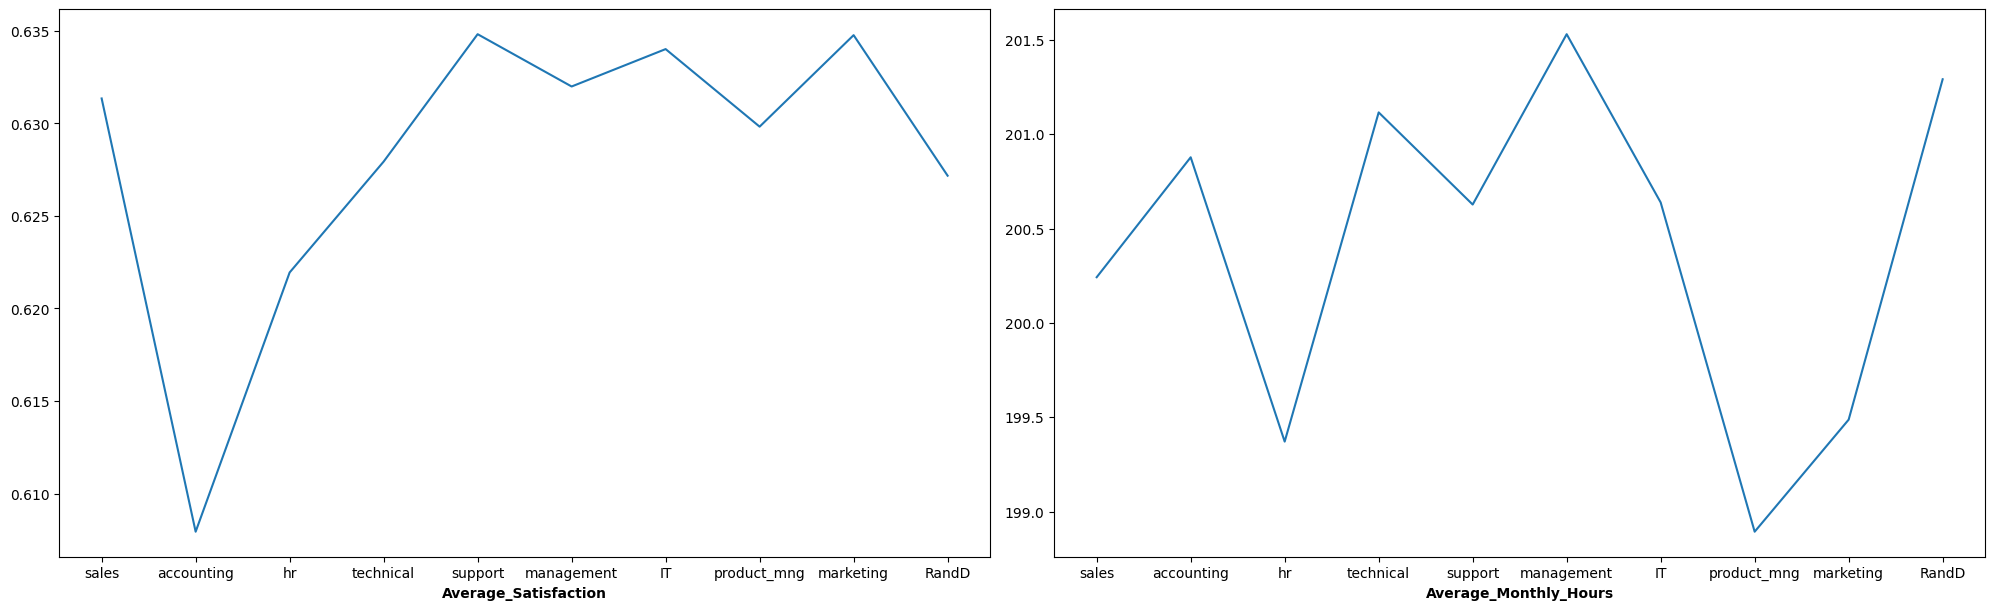

In [19]:
plt.figure(figsize=(30,30))

Avg_Satisfaction = {}
Avg_Monthly_Hours = {}
for dept in df['Department'].unique():
    Avg_Satisfaction[dept] = df[df['Department']==dept]['satisfaction_level'].mean()
    Avg_Monthly_Hours[dept] = df[df['Department']==dept]['average_montly_hours'].mean()

subjects = [Avg_Satisfaction,Avg_Monthly_Hours]

for i in range(0,len(subjects)):
    plt.subplot(5,3,i+1)

    plt.plot(subjects[i].keys(),subjects[i].values())
    plt.xlabel('Average_Satisfaction' if i==0 else 'Average_Monthly_Hours',fontweight='bold')
    plt.tight_layout()

### 4.8. Promotions across departments

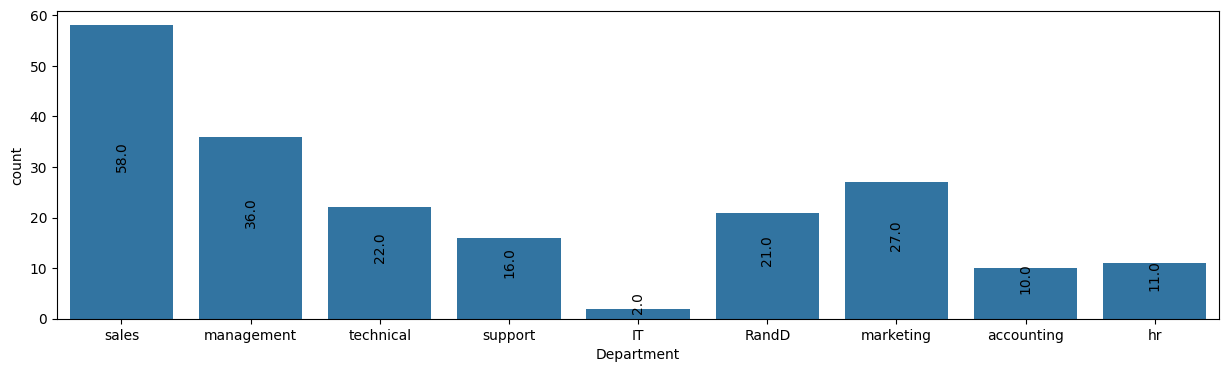

In [20]:
plt.figure(figsize=(15,4))

ax = sns.countplot(data=df[df['promotion_last_5years']==1],x='Department')
    
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height / 2),
                ha='center', va='bottom', rotation = 90, fontsize=10)
plt.show()

#### Onservations:-

1. Sales department has the highest no. of promotions, followed by Management department which occupies suprisingly lowest total no. of employees among departments.
2. Every other department has fair share in promotions, atleast 10+, except IT department from which there are only 2 promotions, which is the 4th leading department in terms of no. of employees. 

### 4.9. Relation of Salary to Employee Attrition

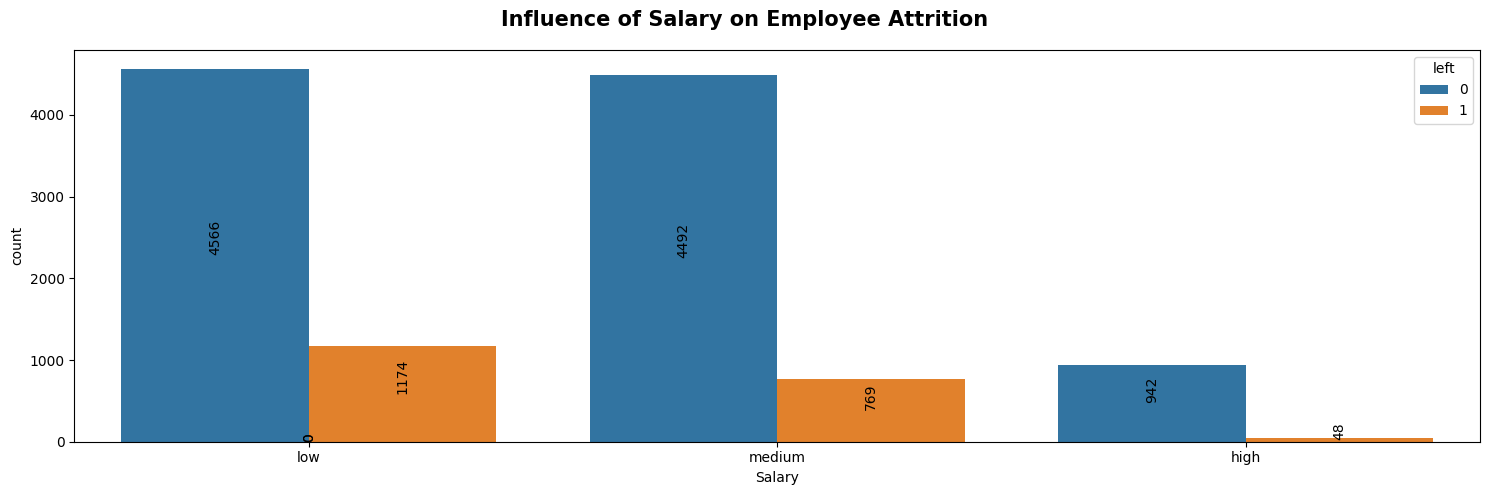

In [34]:
plt.figure(figsize=(15,5))
plt.suptitle("Influence of Salary on Employee Attrition",fontsize=15,fontweight='bold')
ax = sns.countplot(data = df, x = df['salary'], hue = df['left'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., int(height / 2)),
                ha='center', va='bottom', rotation = 90, fontsize=10)

plt.xlabel('Salary')
plt.tight_layout()

20.4% of the employees with low salary, 14.6% with medium salary and 4.8% with high salary have left the company. This is obvious that employees with lesser salaries are leaving the company.

### 4.9. Are higher salary employees more likely to receive promotions?

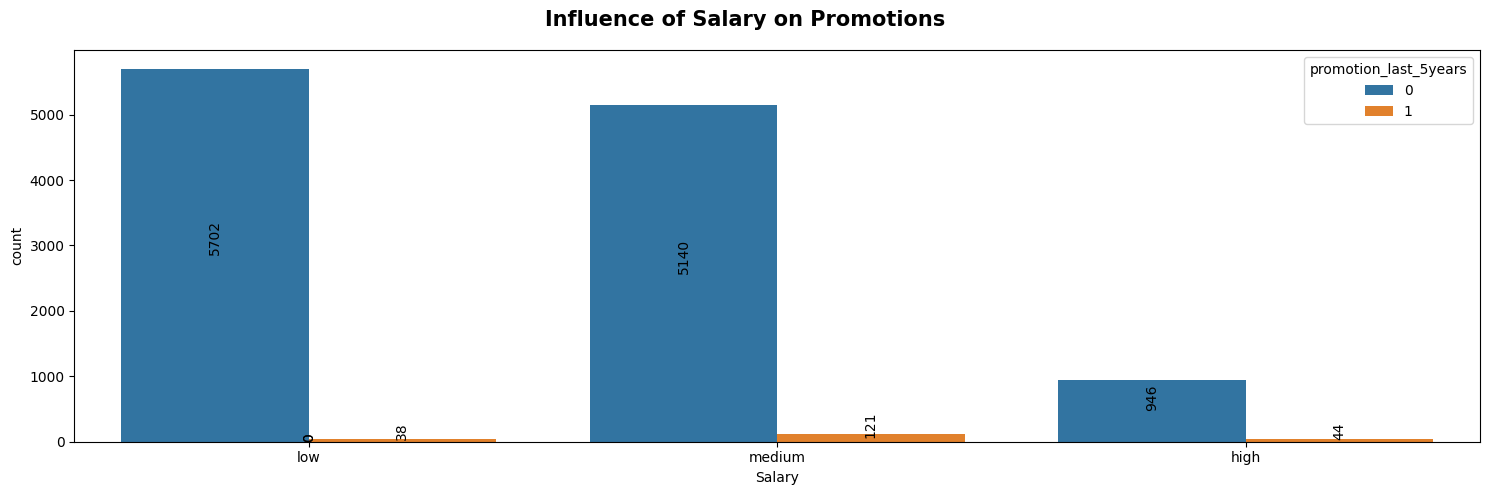

In [35]:
plt.figure(figsize=(15,5))
plt.suptitle("Influence of Salary on Promotions",fontsize=15,fontweight='bold')
ax = sns.countplot(data = df, x = df['salary'], hue = df['promotion_last_5years'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., int(height / 2)),
                ha='center', va='bottom', rotation = 90, fontsize=10)

plt.xlabel('Salary')
plt.tight_layout()

0.66% of the employees with low salary, 2.3% with medium salary, 4.4% with high salary have got promotions in the last 5 years. As we know, the promotions have been really low according to the data with 1.69% of employees out of the total employees in the company.

Still, the trend is that with higher salaries, higher percentage of employees are getting promoted

### 4.10. Satisfaction level across different salary bands

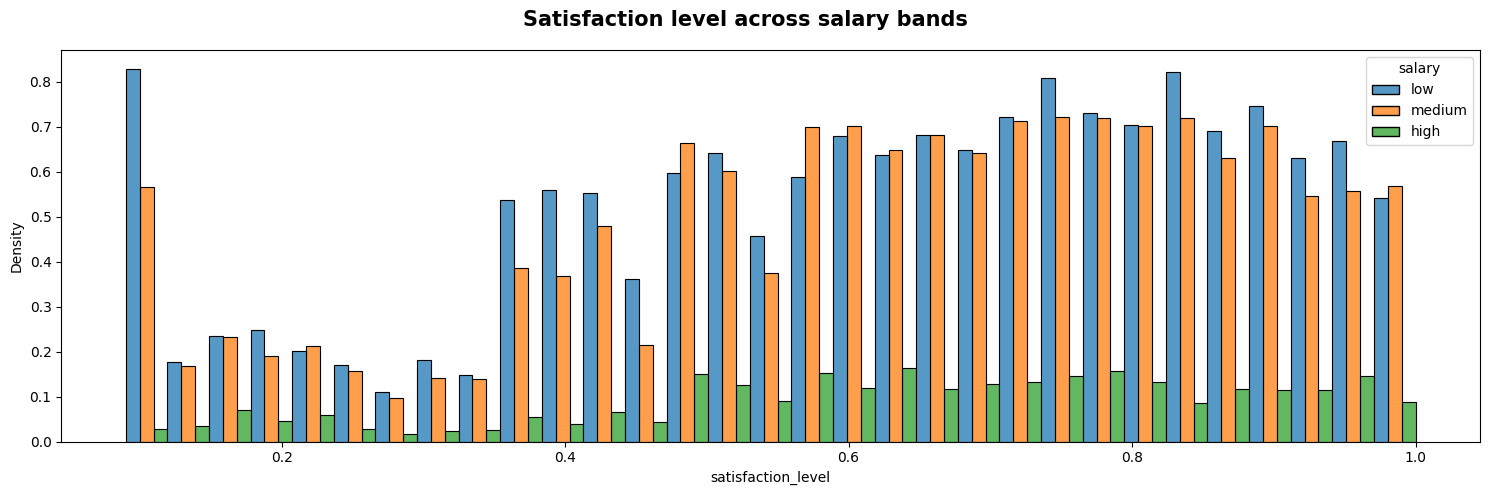

In [47]:
plt.figure(figsize=(15,5))
plt.suptitle("Satisfaction level across salary bands",fontsize=15,fontweight='bold')
sns.histplot(data = df, hue = df['salary'], x = df['satisfaction_level'], multiple='dodge',stat='density')
plt.tight_layout()

### 4.11. Promotions Based on Time Spent in company

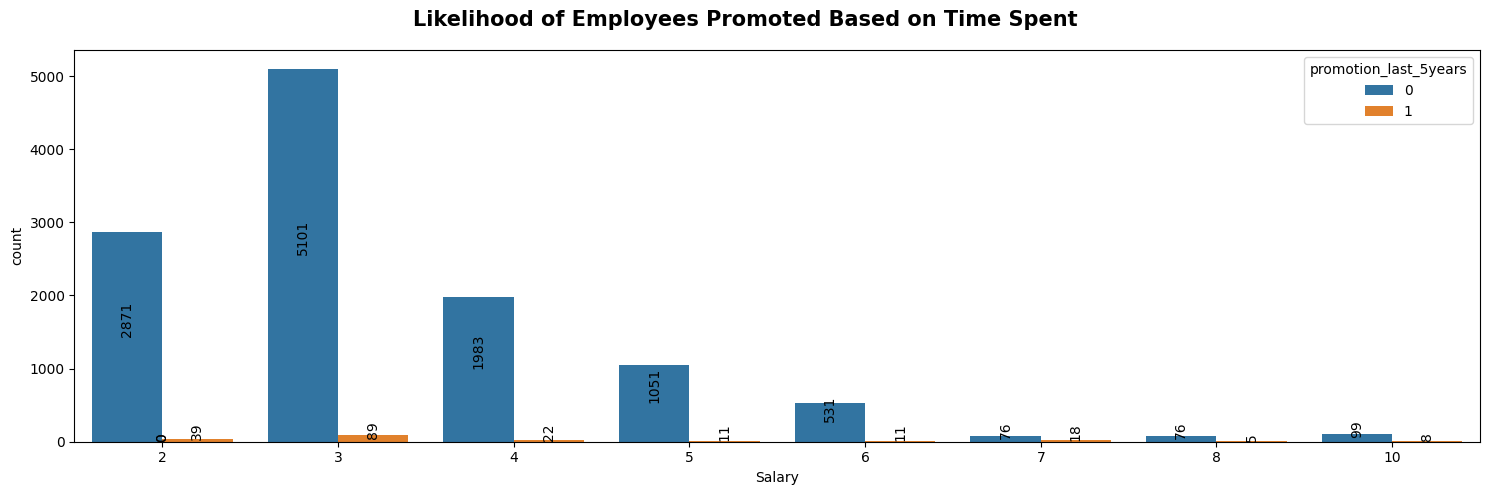

In [69]:
plt.figure(figsize=(15,5))
plt.suptitle("Likelihood of Employees Promoted Based on Time Spent",fontsize=15,fontweight='bold')
ax = sns.countplot(data = df, x = df['time_spend_company'], hue = df['promotion_last_5years'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., int(height / 2)),
                ha='center', va='bottom', rotation = 90, fontsize=10)

plt.xlabel('Salary')
plt.tight_layout()

Time spent in company: 2 years, Not promoted: 98.66%, Promoted: 1.34%
Time spent in company: 3 years, Not promoted: 98.29%, Promoted: 1.71%
Time spent in company: 4 years, Not promoted: 98.90%, Promoted: 1.10%
Time spent in company: 5 years, Not promoted: 98.96%, Promoted: 1.04%
Time spent in company: 6 years, Not promoted: 97.97%, Promoted: 2.03%
Time spent in company: 7 years, Not promoted: 80.85%, Promoted: 19.15%
Time spent in company: 8 years, Not promoted: 93.83%, Promoted: 6.17%
Time spent in company: 10 years, Not promoted: 92.52%, Promoted: 7.48%


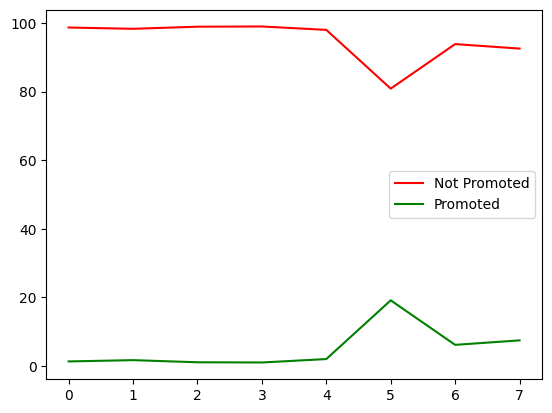

In [75]:
not_promoted_data = []
promoted_data = []
for i in sorted(df['time_spend_company'].unique()):
    data = df[df['time_spend_company']==i]
    not_promoted = data[data['promotion_last_5years']==0]['left'].count()*100/data['left'].count()
    promoted = data[data['promotion_last_5years']==1]['left'].count()*100/data['left'].count()
    not_promoted_data.append(not_promoted)
    promoted_data.append(promoted)
    print(f"Time spent in company: {i} years, Not promoted: {not_promoted:.2f}%, Promoted: {promoted:.2f}%")

sns.lineplot(not_promoted_data, label='Not Promoted', color='red')
sns.lineplot(promoted_data, label='Promoted', color='green')
plt.show()

#### Observations:-

1. Employees with 2-5 years time spent have almost same chance of getting promotion. It is a little higher for employee with 6 years experience (2.03%)
2. We know that with increasing years, the chances of promotion increases but here is an anamolous trend noticed in case of employees with 7 years experience where they are getting 19.15% chance of promotion. On contrary, employees with 6 and 7 years experience have 6.17% and 7.48% chances respectively.

### 4.12. Employees with high performance evaluations receive more promotions?

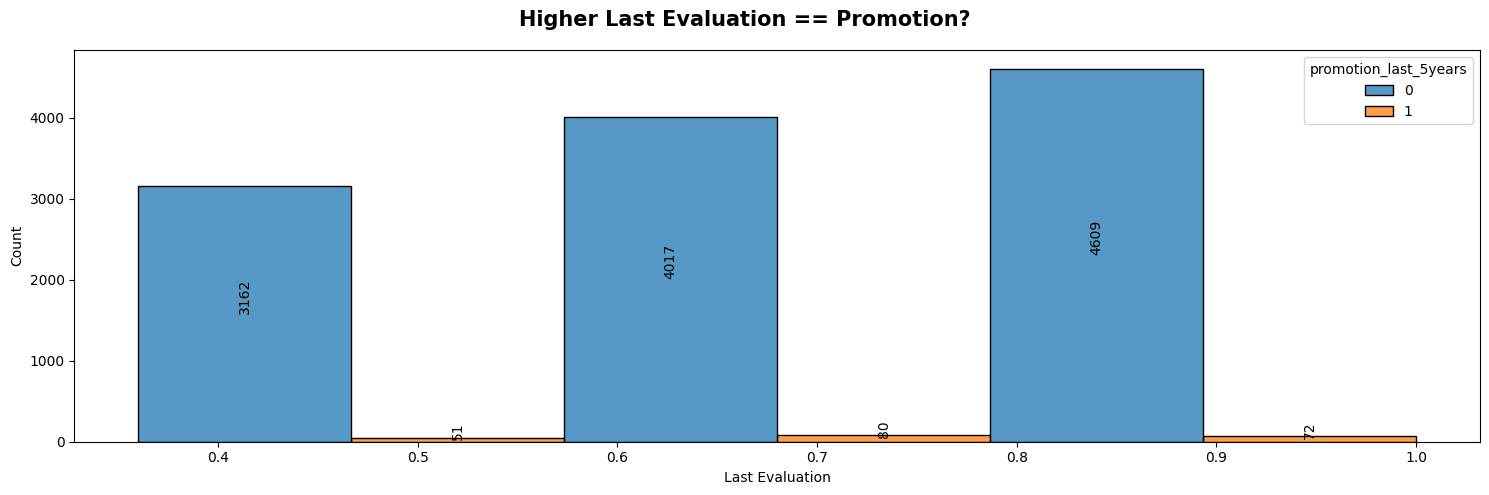

In [87]:
plt.figure(figsize=(15,5))
plt.suptitle("Higher Last Evaluation == Promotion?",fontsize=15,fontweight='bold')
ax = sns.histplot(data = df, hue = df['promotion_last_5years'], x = df['last_evaluation'], multiple='dodge',stat='count',bins=3)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., int(height / 2)),
                ha='center', va='bottom', rotation = 90, fontsize=10)
plt.xlabel('Last Evaluation')
plt.tight_layout()

In [91]:
not_promoted_data = []
promoted_data = []
for i in [0.4,0.5,0.6,0.7,0.8,0.9]:
    data = df[i<=df['last_evaluation']]
    data = data[data['last_evaluation']<i+0.1]
    not_promoted = data[data['promotion_last_5years']==0]['left'].count()*100/data['left'].count()
    promoted = data[data['promotion_last_5years']==1]['left'].count()*100/data['left'].count()
    not_promoted_data.append(not_promoted)
    promoted_data.append(promoted)
    print(f"Last Evaluation: {i:.1f} to {i+0.1:.1f}, Not promoted: {not_promoted:.2f}%, Promoted: {promoted:.2f}%")

Last Evaluation: 0.4 to 0.5, Not promoted: 98.22%, Promoted: 1.78%
Last Evaluation: 0.5 to 0.6, Not promoted: 98.51%, Promoted: 1.49%
Last Evaluation: 0.6 to 0.7, Not promoted: 98.18%, Promoted: 1.82%
Last Evaluation: 0.7 to 0.8, Not promoted: 97.73%, Promoted: 2.27%
Last Evaluation: 0.8 to 0.9, Not promoted: 98.70%, Promoted: 1.30%
Last Evaluation: 0.9 to 1.0, Not promoted: 98.40%, Promoted: 1.60%


We can conclude that there is no much relation between the last evaluation reviews and promotions

### 4.13. Checking frequency of work accidents in specific department and salary level



Axes(0.172591,0.747241;0.132759x0.132759)

 --------------------------------------------------


Axes(0.446121,0.747241;0.132759x0.132759)

 --------------------------------------------------


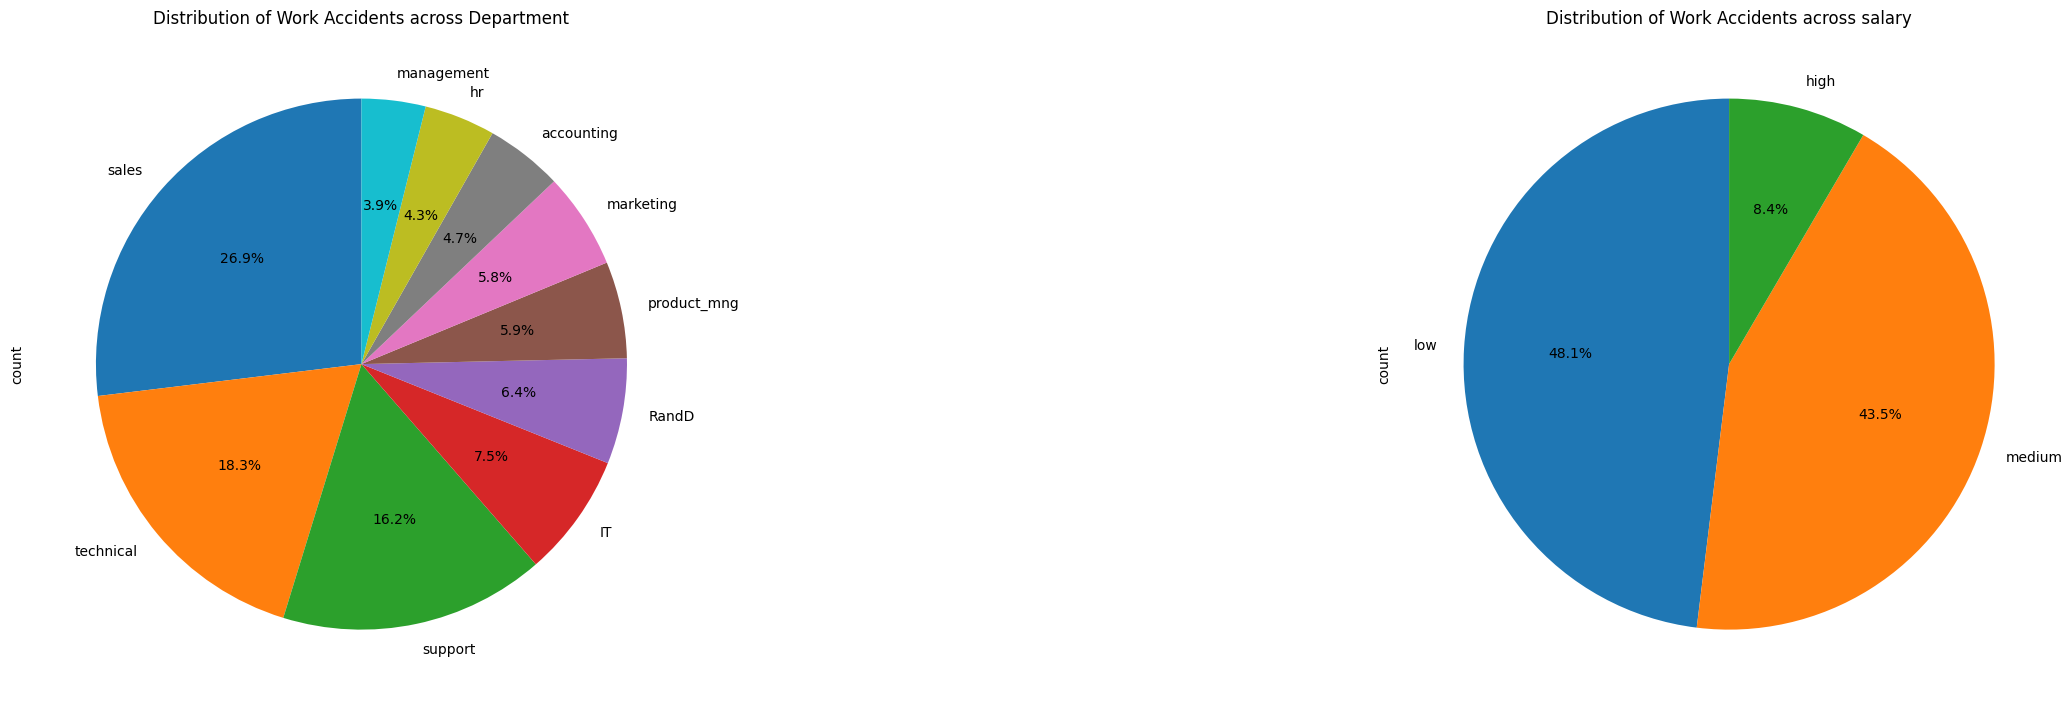

In [122]:
parameters = ['Department','salary']
plt.figure(figsize=(50,50))

for i in range(0,len(parameters)):
    data = df[df['Work_accident']==1]
    plt.subplot(5,3,i+1)
    print('\n')
    print(data[parameters[i]].value_counts().plot.pie(autopct='%1.1f%%', startangle=90))
    plt.title(f"Distribution of Work Accidents across {parameters[i]}")
    print('\n','-'*50)

### 4.14. Multivariate Analysis

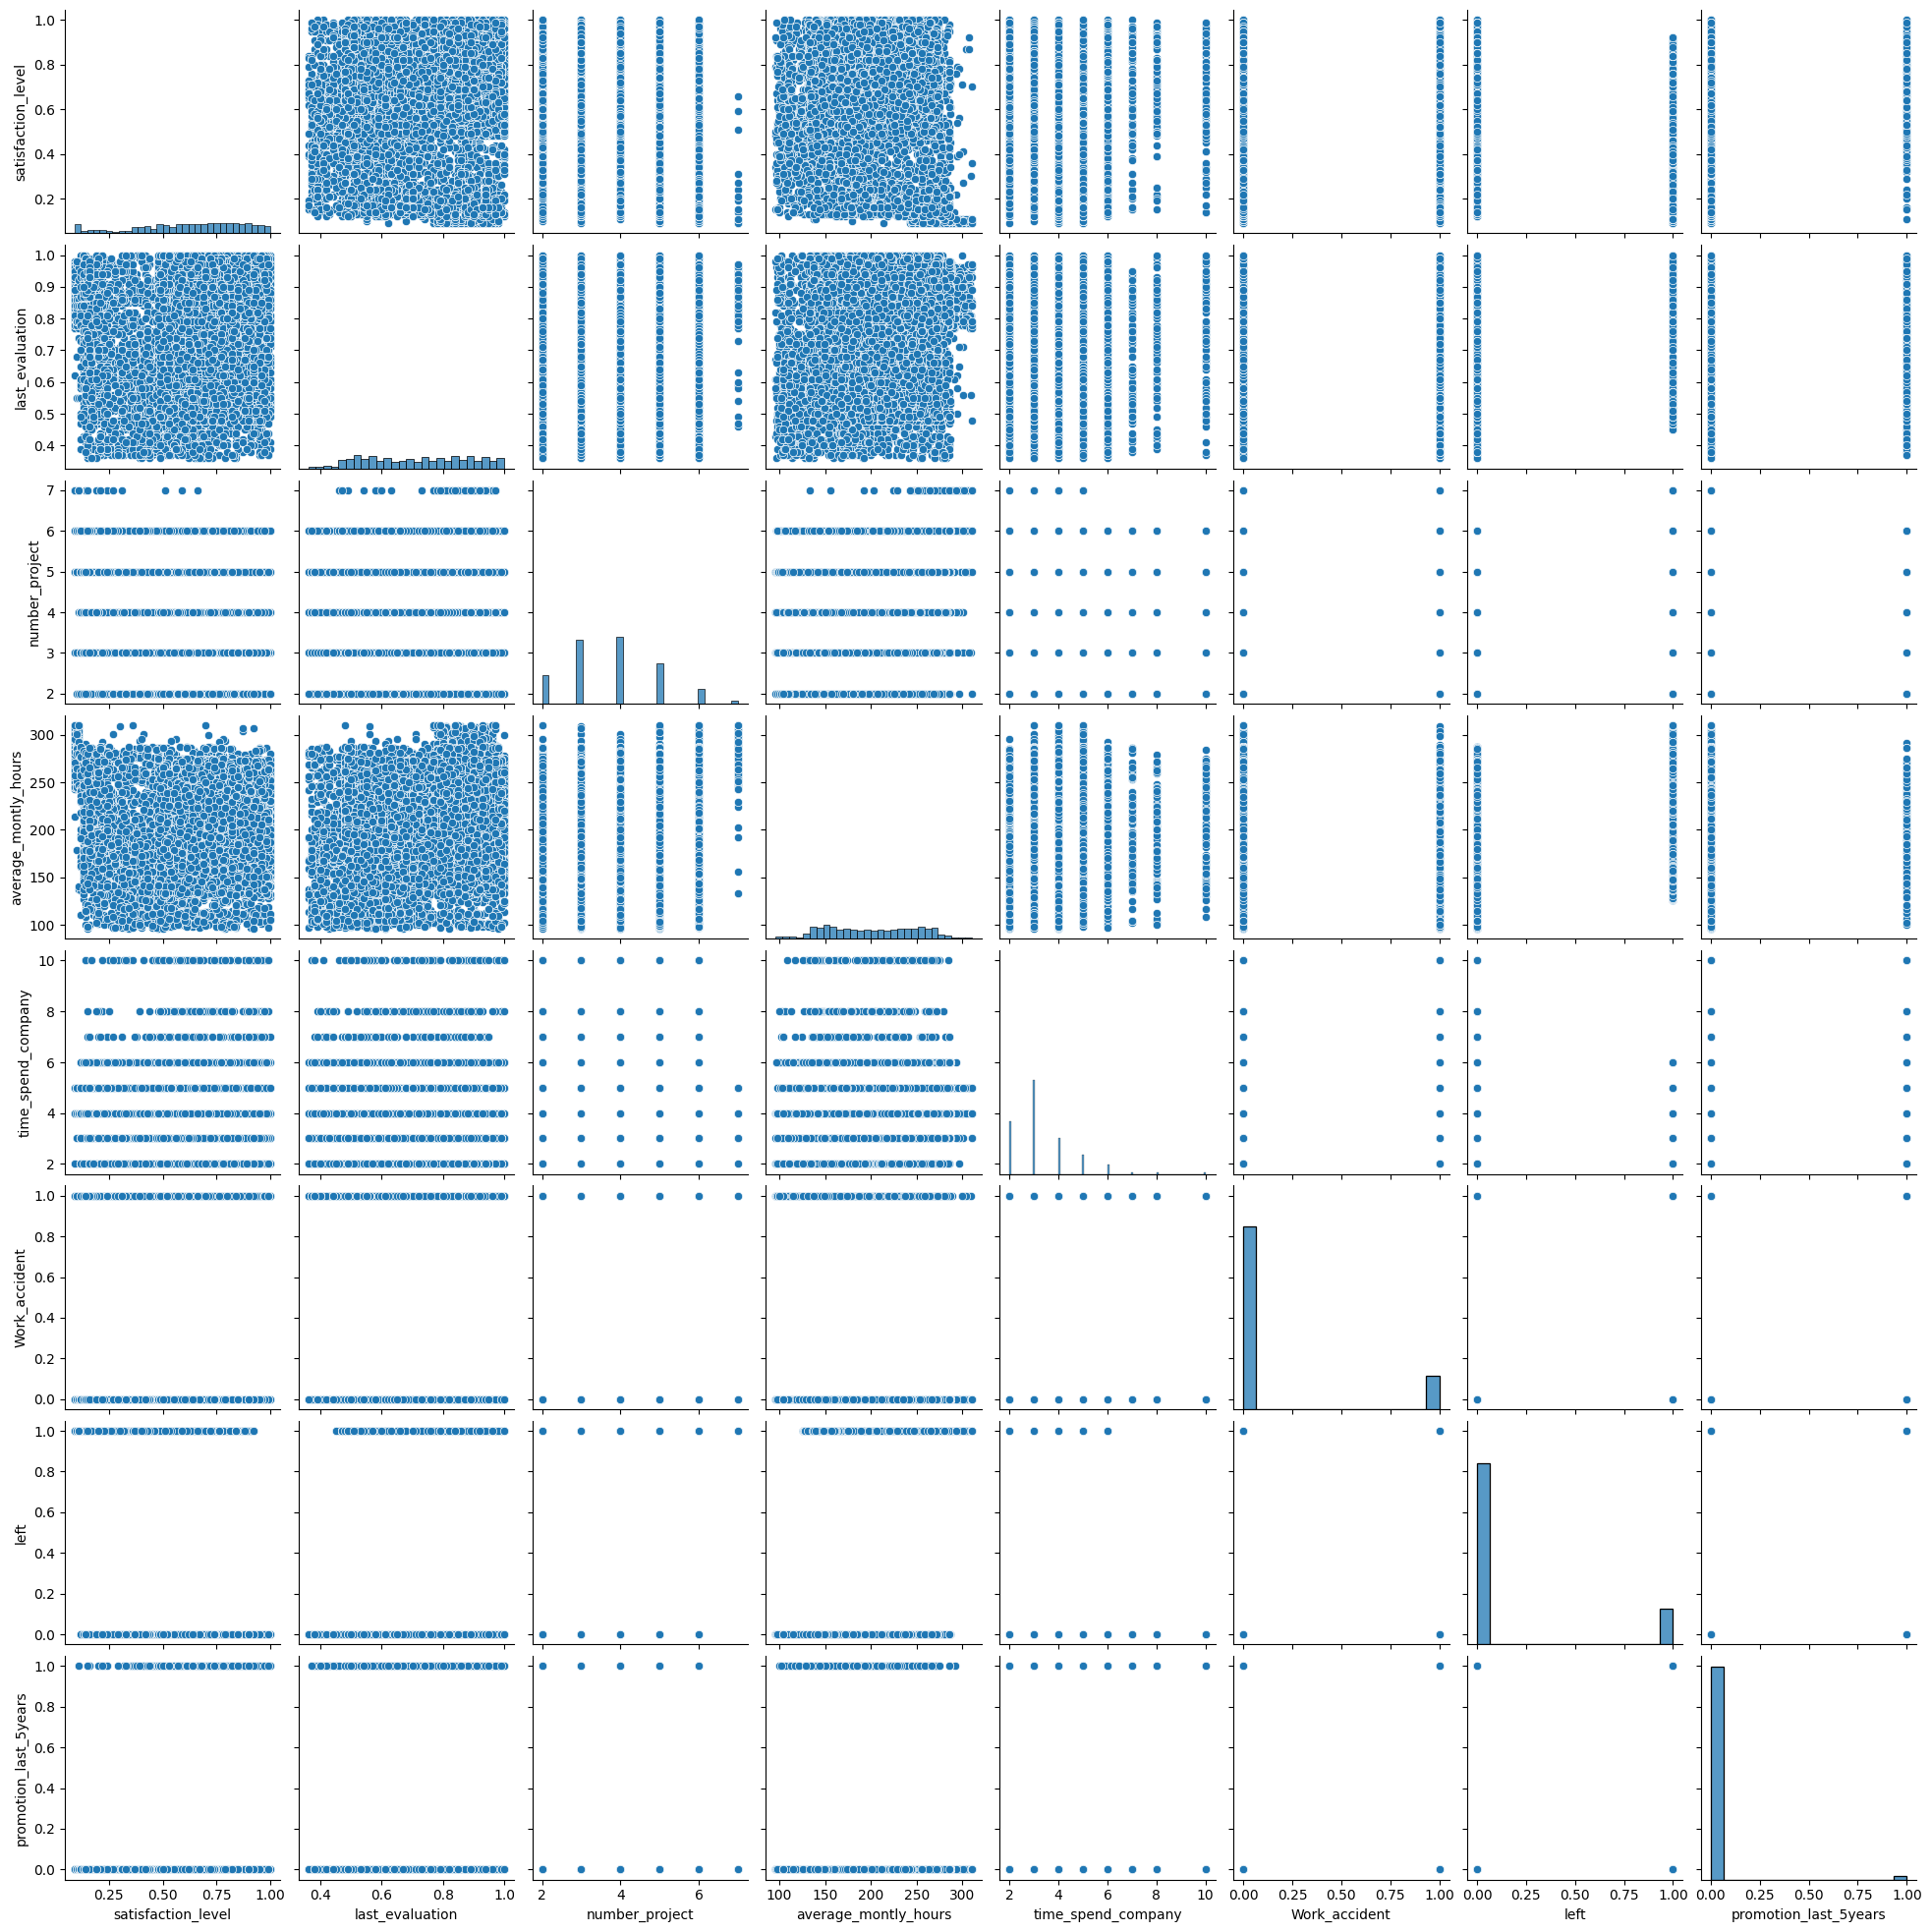

In [124]:
sns.pairplot(df)